# Plot results

In [1]:
%%capture
!pip install plotly==5.24.1
!pip install -U kaleido

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from utils import get_save_dir

os.environ["BROWSER_PATH"] = "/home/myhome/chrome-headless-shell/linux-132.0.6834.83/chrome-headless-shell-linux64/chrome-headless-shell"

In [3]:
results_dir = "results"
n_tasks = 1
seq_len = 50
input_dim = 2
n_embed = input_dim + 1
n_heads = 1
n_blocks = 1
use_layer_norm = False
n_steps = 500
param_lr = 5e-3
seed = 53093

save_dir = get_save_dir(
    results_dir,
    n_tasks,
    seq_len,
    input_dim,
    n_embed,
    n_heads,
    n_blocks,
    use_layer_norm,
    n_steps,
    param_lr,
    seed,
    print_config=False
)

train_losses = np.load(f"{save_dir}/train_losses.npy")
test_losses = np.load(f"{save_dir}/test_losses.npy")
theory_test_losses = np.load(f"{save_dir}/theory_test_losses.npy")
preds_diffs = np.load(f"{save_dir}/preds_diffs.npy")

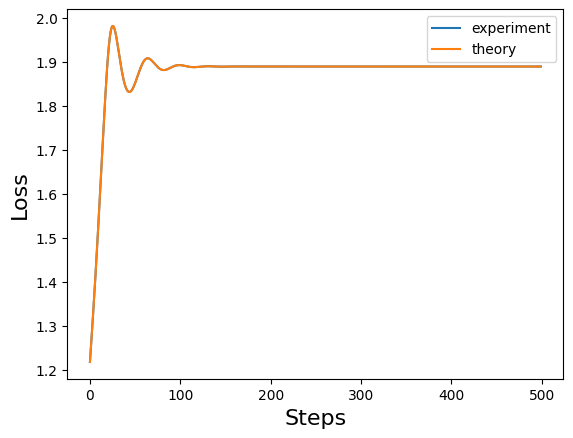

In [6]:
plt.plot(test_losses, label="experiment")
plt.plot(theory_test_losses, label="theory")
plt.xlabel("Steps", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend()

Text(0, 0.5, 'Difference')

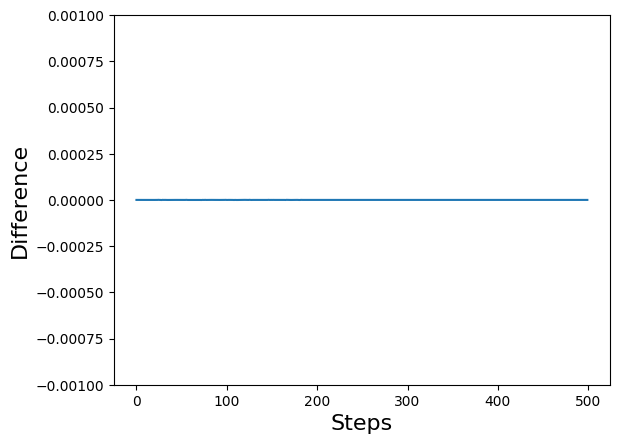

In [13]:
plt.plot(preds_diffs)
plt.ylim(-1e-3, 1e-3)
plt.xlabel("Steps", fontsize=16)
plt.ylabel("Difference", fontsize=16)